In [116]:
import pandas as pd
import numpy as np

In [117]:
corona = pd.read_csv("../csv/corona.csv")

In [118]:
corona.drop(["Unnamed: 0"], axis="columns", inplace=True)

In [119]:
corona.columns = ['등록일시', '사망자', '확진자', '게시글번호', '기준일', '기준시간', '수정일시', '누적의심자', '누적확진률']

In [120]:
corona.sort_values(["등록일시"], inplace=True)

In [121]:
corona.reset_index(drop=True, inplace=True) 

In [122]:
corona["일일확진자"] = corona["확진자"].diff()
corona["일일사망자"] = corona["사망자"].diff()
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [123]:
## 결측치를 채우는 함수
## fillna(결측치에 들어갈 값)
corona["일일확진자"] = corona["일일확진자"].fillna(0) # 0을 채워도 되고 평균값을 채워도 되고...
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [124]:
# fillna(옵션)
# method 속성 -> ffill, bfill
# fill 채우다 라는 의미, f:front / b:back
# ffill -> 전의 값으로 채운다
# bfill -> 후의 값으로 채운다
# 누적의심자 컬럼의 값들을 fillna(method = 'bfill')
corona["누적의심자"].fillna(method = 'bfill')

0      210144.0
1      222395.0
2      234998.0
3      248647.0
4      261335.0
         ...   
815         NaN
816         NaN
817         NaN
818         NaN
819         NaN
Name: 누적의심자, Length: 820, dtype: float64

In [125]:
corona["누적의심자"].fillna(method = 'ffill')

0        210144.0
1        222395.0
2        234998.0
3        248647.0
4        261335.0
          ...    
815    21518073.0
816    21518073.0
817    21518073.0
818    21518073.0
819    21518073.0
Name: 누적의심자, Length: 820, dtype: float64

In [126]:
# 누적확진률의 결측치 값을 누적확진률의 평균으로 채운다.
#corona["누적확진률"] = corona["누적확진률"].fillna(corona['누적확진률'].mean())
corona["누적확진률"].fillna(corona['누적확진률'].mean(), inplace=True)

In [127]:
# filter 기능
# query()
corona.query("일일확진자 < 0") #이런 경우가 있으면 안되는데 나옴

# 조건식에 맞는 필터기능
# 일일확진자의 0보다 작은 값을 출력하겠다!

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [ ]:
# 위의 쿼리를 이용해 해당 내용 부분 결측값으로 만들어 없애기
corona.query("일일확진자 < 0")["일일확진자"] = np.nan #numpy를 이용해 nan 결측치 만들기
corona.dropba(axia =0) #0 : 행, rows

In [128]:
# 인덱스 444부터 448까지 데이터를 출력
# 일일확진자수 -인 데이터를 확인하기 위해
corona.loc[444:448]

# 445번 데이터가 등록일시 00이 빠져있음 -> 수정했지만 무언가 오류가 있었을것.

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


In [129]:
corona["누적확진률"]

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

In [130]:
# lambda 함수 파생변수
# 일반 def 함수 파생변수
# 누적확진률 컬럼에서 누적확진률의 평균보다 높으면 High, 낮으면 Low라고 표시하는 파생변수

# lambda 매개변수 : 표현식
# 위의 누적확진률의 값이 x가 되어, 하나씩 들어갈 것
corona["누적확진률"].apply(lambda x : "High" if (x > corona["누적확진률"].mean()) else "Low")
                                    #조건식이 참일 때 이거 띄워줘
                                            #조건식
                                                                                #아니면 이거 띄워줘
# else로 쓰면 같은 경우도 Low로 표시됨

# corona.head() #근데 난 왜 평균값도 High로 표시되지

0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: 누적확진률, Length: 820, dtype: object

In [ ]:
# apply 함수는 x값을 받아와서 return 시켜주는 형태

# lambda 함수를 사용할 때
# 값을 먼저 적어주고 if 조건식, else 거짓일 때 return 해줄 값을 적어줌
corona["누적확진률"].apply(lambda x : "High" if (x > corona["누적확진률"].mean()) else "Low")
                                #나와야 하는 값
                                            #조건식                                #거짓일때 return 값


In [131]:
corona["H/L"] = corona["누적확진률"].apply(lambda x : "High" if (x > corona["누적확진률"].mean()) else "Low")

In [132]:
corona["H/L"].value_counts()

Low     421
High    399
Name: H/L, dtype: int64

In [133]:
corona["누적확진률"].value_counts
# 교수님 파일이랑 파일 갯수가 달라서 H L 다르게 표시된 거였음~

<bound method IndexOpsMixin.value_counts of 0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64>

In [134]:
# apply() 일반 함수 => 데이터 한 개 한 개씩 lambda에 집어 넣어준다.
# 함수 생성
# 매개변수 1개 존재, 매개변수의 값이 누적확진률의 평균보다 높으면 High return
# 조건식이 거짓이면 Low return

def if_mean(x):
    if x > corona["누적확진률"].mean():
        return "High"
    else :
        return "Low"

In [135]:
if_mean(1)

'Low'

In [136]:
corona["누적확진률"].apply(if_mean) #원래는 if_mean() 이렇게 해줘야 하지만, 함수명만 넣어주면 자동으로 apply가 넣어준다~
# corona["누적확진률"].apply(lambda x : "High" if (x > corona["누적확진률"].mean()) else "Low") 이거랑 같은 행동, 둘 중 편한 방식으로 쓰면 된다.
# 보통은 함수를 선언하고 함수를 호출해서 쓰는 게 더 편한데, 나중에 함수 만들기 귀찮아서 lambda 쓰기도 한다.

0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: 누적확진률, Length: 820, dtype: object

In [137]:
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High


In [138]:
# 요일이라는 파생변수 생성
# 등록일시 datetime 변경
# datetime 기준으로 요일을 출력
corona["등록일시"] = pd.to_datetime(corona["등록일시"]) #원래는 format을 써야 돌아가지만, 해당 자료는 datetime의 교과서 같은 자료로 굳이 안써도 됨

#corona["등록일시"] = pd.to_datetime(corona["등록일시"], format = format="%Y-%m-%d %H:%M:%S")

In [139]:
# dt.weekdat 사용하면 요일이 숫자로 표시된다.
# 0 -> 월, 6 -> 일
corona["요일"] = corona["등록일시"].dt.weekday
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High,1
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,4
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,5


In [140]:
## apply 함수를 이용해서 숫자로 표시되어 있는 요일 컬럼을 한글로 변경해보기

def tsday(x) :
    if x == 1 :
        return "월"
    elif x == 2 :
        return "화"
    elif x == 3 :
        return "수"    
    elif x == 4 :
        return "목"
    elif x == 5 :
        return "금"
    elif x == 6 :
        return "토"
    else :
        return "일"    

In [141]:
tsday(1)

'월'

In [142]:
corona["요일"] = corona["요일"].apply(tsday)
corona["요일"].head()

0    월
1    화
2    수
3    목
4    금
Name: 요일, dtype: object

In [143]:
# corona["요일"].apply(lambda x : "월" if x == 0 else "화" if x == 1 else "수") 이런 식으로 써야하기 때문에 위와 같은거 lambda로 잘 안씀

# 요일별 코로나의 확진자수의 평균이 어떻게 표시되는가? -> 요일 컬럼 기준으로 groupby 묶고 .mean()
# 그래프를 이용해서 출력

week_corona = corona.groupby("요일").mean()
week_corona.head()

,사망자,확진자,게시글번호,기준일,누적의심자,누적확진률,일일확진자,일일사망자
요일,,,,,,,,
금,3908.427350,1.896723e+06,471.940171,2.020901e+07,7.575484e+06,1.550996,22555.948718,32.504274
목,3875.923077,1.874167e+06,470.940171,2.020893e+07,7.541537e+06,1.552697,22542.854701,32.897436
수,3873.922414,1.867492e+06,472.991379,2.020893e+07,7.576033e+06,1.555236,25776.267241,34.206897
월,3954.652542,1.937736e+06,471.364407,2.020895e+07,7.437156e+06,1.570840,21787.296610,27.000000
일,3978.267241,1.947711e+06,473.750000,2.020901e+07,7.594898e+06,1.554822,14862.586207,24.267241


In [144]:
week_corona["일일확진자"]
# 이 데이터로 그래프 그려볼 것
# 한글 오름차순으로 나오는거 아닐지? 교수님 피셜

요일
금    22555.948718
목    22542.854701
수    25776.267241
월    21787.296610
일    14862.586207
토    20625.101695
화    26994.550847
Name: 일일확진자, dtype: float64

그려볼까 그래프?

In [145]:
from matplotlib import font_manager, rc

In [146]:
import matplotlib.pyplot as plt

In [147]:
week_corona.index
# 이건 리스트 형태

Index(['금', '목', '수', '월', '일', '토', '화'], dtype='object', name='요일')

In [148]:
week_corona["일일확진자"]
# 이건 시리즈 형태, 그래프를 만들 때는 리스트형태로 바꿔줘야한다.

요일
금    22555.948718
목    22542.854701
수    25776.267241
월    21787.296610
일    14862.586207
토    20625.101695
화    26994.550847
Name: 일일확진자, dtype: float64

In [153]:
week_corona.index

Index(['금', '목', '수', '월', '일', '토', '화'], dtype='object', name='요일')

Index(['금', '목', '수', '월', '일', '토', '화'], dtype='object', name='요일')
요일
금    22555.948718
목    22542.854701
수    25776.267241
월    21787.296610
일    14862.586207
토    20625.101695
화    26994.550847
Name: 일일확진자, dtype: float64


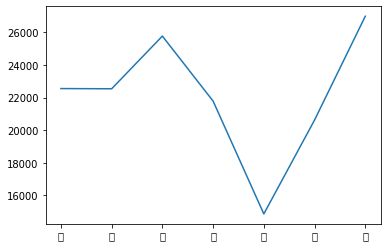

In [157]:
# x축의 값 -> 요일
# y축의 값 -> 일일확진자 수의 평균값 (평균 확진자수)
x = week_corona.index
y = week_corona["일일확진자"]

# C드라이브 -> windows -> fonts
file_path = "C:/Windows/Fonts/08SeoulNamsanB.TTF" #경로 복사해와서 \를 /로 바꿔줘야함
font = font_manager.FontProperties(fname = file_path).get_name() #get_name() 이거 찾아와~

rc('font', family=font)

# plt.plot(x, y)
# plt.show()

print(x)
print(y)

plt.plot(y)

In [ ]:
# 정석 방법으로 하면 위의 코드 오류남
# tuple index가 포함되어 있다는 것 같은데 왜인지는 모르겠음
